In [10]:
!pip install graphviz
!pip install transformers
!pip install bert
!pip install bert-tensorflow
!pip install keras
!pip install dask_ml
!pip install xgboost
!pip install datascroller
!pip install tensorflow

In [17]:
!pip install numpy

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle
import time
import timeit

# Import dask packages
# import dask.dataframe as ddf
from math import nan
import panel as pn
import dask
import dask.array as da
import dask.dataframe as dd
from dask.delayed import delayed
import seaborn as sns
import matplotlib.pyplot as plt
from dask_ml.model_selection import train_test_split
import graphviz
from datascroller import scroll

from dask.diagnostics import ProgressBar
ProgressBar().register()

# text processing libraries
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import json
import os
import sys
import tensorflow as tf

import transformers as ppb
from time import time
import io
import re
from csv import reader

import bert
# from bert import run_classifier
# from bert import optimization
from bert import tokenization
from transformers import RobertaTokenizer, TFRobertaModel

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from tensorflow import keras
#### if use tensorflow=2.0.0, then import tensorflow.keras.model_selection 
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.backend import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Install BERT and BERT Tokenizer from the HuggingFace Transformers library.

We can easily switch between variants of BERT by changing out which model we import from HuggingFace; the rest of the code just flows unchanged.

In [ ]:
# For DistilBERT:
# model_class, tokenizer_class, pretrained_weights = (ppb.TFDistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.TFBertModel, ppb.BertTokenizer, 'bert-base-uncased')

## For BERT Large, use this:
# model_class, tokenizer_class, pretrained_weights = (ppb.AutoModelWithLMHead, ppb.AutoTokenizer, 'bert-large-uncased')
# from transformers import AutoTokenizer, AutoModelWithLMHead

# For ROBERTa base model, use this:
# model_class, tokenizer_class, pretrained_weights = (ppb.TFRobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

## Let's do an initial import on the sample dataset Padma created for HS4 codes 8712 and 8714

In [6]:
!ls /data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode

sample_by_chapter
sample_ignore_multiple_hscode_87128714.parq
sample_ignore_multiple_hscode_chap39_40.parq


In [2]:
# first sample
# import_df = dd.read_parquet('/data/common/trade_data/2019/data_samples/sample_87128714.parq', engine='fastparquet', chunksize="100MB")

# updated sample with the multple hs codes entries removed
# import_df = dd.read_parquet('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_ignore_multiple_hscode_chap39_40.parq', engine='fastparquet', chunksize="100MB")

import_df = pd.read_parquet('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_ignore_multiple_hscode_chap39_40.parq')

In [21]:
import_df.columns

Index(['System Identity Id', 'Estimate Arrival Date', 'Actual Arrival Date',
       'Bill of Lading', 'Master Bill of Lading', 'Bill Type Code',
       'Carrier SASC Code', 'Vessel Country Code', 'Vessel Code',
       'Vessel Name', 'Voyage', 'Inbond Type', 'Manifest No',
       'Mode of Transportation', 'Loading Port', 'Last Vist Foreign Port',
       'US Clearing District', 'Unloading Port', 'Place of Receipt', 'Country',
       'Country Sure Level', 'Weight in KG', 'Weight', 'Weight Unit', 'TEU',
       'Quantity', 'Quantity Unit', 'Measure in CM', 'Measure', 'Measure Unit',
       'Container Id', 'Container Size', 'Container Type',
       'Container Desc Code', 'Container Load Status',
       'Container Type of Service', 'Shipper Name', 'Shipper Address ',
       'Raw Shipper Name', 'Raw Shipper Addr1', 'Raw Shipper Addr2',
       'Raw Shipper Addr3', 'Raw Shipper Addr4', 'Raw Shipper Addr Others',
       'Consignee Name', 'Consignee Address ', 'Raw Consignee Name',
       'Raw Con

In [22]:
# Don't truncate text fields in the display
pd.set_option("display.max_colwidth", -1)

import_df.head(2)

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,Cleaned_HS_Code,HS_Code,Merged_Description,HS2 Chapter,HS4
8191698,6003201905010000485147,20190429,20190429,SUDU29297AGIX154,None,R,"SUDU, SUD HAMBURG/COLUMBUS LINE",SG,9283239,MONTE VERDE,...,8,1009800.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyethylene having a specific gravity of less than 0.94 ;Having a relative viscosity of 1.44 or more;Other;Linear low density polyethylene;Low density polyethylene, except linear low density polyethylene;Medium density polyethylene",39,3901
8021902,6003201904150000515332,20190412,20190412,CMDULHV2002586,None,R,"CMDU, COMPAGNIE MARITIME DAFFRETEMEN",GB,9317975,CMA CGM WHITE SHARK,...,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyethylene having a specific gravity of less than 0.94 ;Having a relative viscosity of 1.44 or more;Other;Linear low density polyethylene;Low density polyethylene, except linear low density polyethylene;Medium density polyethylene",39,3901


In [3]:
len(import_df.index)

134035

In [4]:
df1 = import_df[['Product Desc', 'Cleaned_HS_Code']]
df1.columns = ['Desc', 'HSCode']
print(df1.head(2))
print(len(df1))

                                                      Desc  HSCode
8191698  CONTENIENDO 24.75 MTLDF2023S1 LOW DENSITY POLY...  390110
8021902  FREIGHT PAYABLT AT LE HAVRE ROTOMOLDING LINEAR...  390110
134035


In [5]:
hs_code_desc = import_df[['Cleaned_HS_Code', 'Merged_Description']]
hs_code_desc = hs_code_desc.drop_duplicates()
hs_code_desc.columns = ['HSCode', 'Desc']
print(hs_code_desc.head(2))
print(len(hs_code_desc))

         HSCode                                               Desc
8191698  390110  Polymers of ethylene, in primary forms ;Polyet...
1848406  390120  Polymers of ethylene, in primary forms ;Polyet...
209


In [6]:
df1 = df1.append(hs_code_desc[['Desc', 'HSCode']]).reset_index()
len(df1)

134244

In [ ]:
# convert the dataframes back to pandas

# df1_pd = df1.compute()
# len(df1_pd)

In [7]:
df1_pd = df1

Remove long number sequences (that potentially contain HS Codes) from the descriptions.

In [8]:
df1_pd['Desc'] = [re.sub('\d{4,}', '', x) for x in df1_pd['Desc']]

### Let's tokenize the description fields.

#### Create embeddings with nltk

In [ ]:
# def tokenize(data, column_name):
#     '''
#     Tokenize text
#     '''
#     tokens = data[column_name].apply((lambda x: nltk.word_tokenize(x)))
    
#     data['NLTK'+column_name] = np.array(tokens)
    
#     return data
# #     return list(
# #         filter(lambda word: word.isalnum(), tokens)
# #     )

# stop_words = stopwords.words("english")

# def remove_stopwords(words):
#     '''
#     Remove stop words from the list of words
#     '''
    
#     filtered = filter(lambda word: word not in stop_words, words)
    
#     return list(filtered)

#### Create embeddings with BERT

In [ ]:
# def pre_process(data, column_name, max_length):
#     """
#     Function takes inputs:
#     - data in the form of a pandas dataframe
#     - column_name containing the text to be embedded
#     - max length
#     and produces as output the input data BERT requires as an array consisting of:
#     - Sentence IDs padded to the max length
#     - BERT Masks that tell BERT which of the Sentence IDs are 0 and should be ignored
#     - SequenceIDs which are all 0 for our classification task
#     """
#     # Tokenize each item and add the special beginning/end tokens
#     tokenized = data[column_name].apply((lambda x: tokenizer.encode(x, add_special_tokens=False, max_length=max_length, truncation=True)))
#     data['BERT_'+column_name] = np.array(tokenized)
# #     data['BERT_'+column_name] = tokenized
      
# #     # Create the padding based on the max length so all are same shape
# #     bertSentenceIDs = np.array([i + [0]*(max_length-len(i)) for i in tokenized.values])
    
# #     # Create the attention mask so BERT knows which contain values and which are 0s that should be ignored
# #     bertMasks = np.where(bertSentenceIDs != 0, 1, 0)

# #     # Create the BERT sequence IDs. In this case they are all 0 since it's the same sentence input.
# #     bertSequenceIDs = np.array([np.zeros(max_length) for i in tokenized.values], dtype=int)
    
# #     # Create and return the data array containing both the padded and the attention mask
# #     X_data = np.array([bertSentenceIDs, bertMasks, bertSequenceIDs])

# #     # Also look at the vocabulary size in the tokenizer

#     return data

In the past we have run into memory issues depending on the length of the input, so we set up a variable to truncate the tokens being input for each record.

First, let's check the max length of the different tokenized columns of interest.

In [ ]:
# length_lst = ['Product Desc', 'Merged_Description']

# max_length_dict = {}

# for l in length_lst:
#     tokenized = []
#     tokenized = import_df_pd[l].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
#     # Find the max length for the tokenized examples
#     max_length = 0
#     for i in tokenized.values:
#         if len(i) > max_length:
#             max_length = len(i)
            

#     print('Max length of column', l, max_length)

This could be a problem if we have very, very short entries in the description fields.

Some possible solutions:
1. Augment each entry with the dictionary definition.
2. Add extra training records of just the dictionary definition.
3. Train on only the dictionary definition.

### Encode the description fields.

In [ ]:
# max_length = 180

# # Create BERT embeddings for Product Desc and Merged_Description, append to pandas dataframe
# X_pd = pre_process(df1_pd, 'Desc', max_length)



# # Create NLTK embeddings for Product Desc and Merged_Description, append to pandas dataframe
# X_pd = tokenize(X_pd, 'Desc')

# X_pd.head()



### Create train, dev, and test sets

In [9]:
X_pd = df1_pd

In [10]:
y_pd = X_pd['HSCode']
type(y_pd)

pandas.core.series.Series

In [11]:
# X = X_pd['Desc']
y = X_pd['HSCode']

# Split once to create the test set
X_temp, X_test, y_temp, y_test = train_test_split(X_pd, y, test_size=0.2, random_state=91)

# Re-split the train set to create a dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_pd, y, test_size=0.2, random_state=91, stratify=y)

print('Size of the train set is', len(X_train))
print('Size of the dev set is', len(X_dev))
print('Size of the test set is', len(X_test))
print('Size of the train label set is', len(y_train))
print('Size of the dev label set is', len(y_dev))
print('Size of the test label set is', len(y_test))


Size of the train set is 107395
Size of the dev set is 26849
Size of the test set is 26849
Size of the train label set is 107395
Size of the dev label set is 26849
Size of the test label set is 26849


In [24]:
X_train.head(2)

,index,Desc,HSCode
57017,57017,12 PACKAGES WITH 144ROLLS ROLLS OF CELLULAR PVC FILM COMBINED WITH TEXTILE MATERIALS. REF: GREEN VINYL NET WEIGHT: .35KGS P.A <br/>,392049
37332,37332,RUBBER CHEMICAL DIOTOLYLGUANIDINE DOTG PDR-D .<br/>,391390


In [45]:
X_dev.head(2)

,index,Desc,HSCode
28997,2113176,ION EXCHANGE RESINS PO <br/>,390910
128828,6885399,NBR VULCANIZED CELLULAR NBR RUBBER PO#: HS CODE:.10. THIS SHIPMENT CONTAINS NO SOLID WOOD PACKING MATERIALS.<br/>,401610


## Create baseline of predicting the majority class

In [12]:
counts = X_train['HSCode'].value_counts().to_dict()
# print(counts)
max_value = max(counts.values())
print('Accuracy when predicting majority class ', max_value/len(X_train))

Accuracy when predicting majority class  0.0074584477862097865


## Construct a Naive Bayes model

### Use BOW on the words in the Product Desc column

In [ ]:
count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Desc'])


In [ ]:
clf1 = MultinomialNB().fit(X_train_counts, y_train)

In [ ]:
X_new_counts = count_vector.transform(X_dev['Desc'])
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf1.predict(X_new_counts)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
plt.figure(figsize=(30,30))
plot_confusion_matrix(clf1, X_new_counts, y_dev)

plt.show()

### Use TF-IDF on the words in the Product Desc column

In [ ]:

count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Desc'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.

tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 

clf2 = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Desc'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf2.predict(X_new_tfidf)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
cm = confusion_matrix(y_dev, predicted)
cm

In [ ]:
# Plot non-normalized confusion matrix


plt.figure(figsize=(30,30))
plot_confusion_matrix(clf2, X_new_tfidf, y_dev)

plt.show()

### Use BOW on the Merged Description field

In [ ]:
# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Merged_Description'])

# # Import TfidfTransformer class.
# # TfidfTransformer transoforms count matrix to tf-idf representation.
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()

# # fit_transform transforms count matrix to tf-idf representation(vector).
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB().fit(X_train_counts, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Merged_Description'])
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf3.predict(X_new_counts)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(30,30))
plot_confusion_matrix(clf3, X_new_counts, y_dev)

plt.show()

### Use TF-IDF on the Merged Description field

In [ ]:
# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Merged_Description'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Merged_Description'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf2.predict(X_new_tfidf)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(30,30))
plot_confusion_matrix(clf2, X_new_tfidf, y_dev)

plt.show()

In [ ]:
cm = confusion_matrix(y_dev, predicted)
cm

### Use the BERT embeddings in the Product Desc column

In [ ]:
# Convert the embedding column from list to string
X_train['BERTProduct Desc'] = X_train['BERTProduct Desc'].apply(str).apply(', '.join)
X_train.head()

In [ ]:
count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_train_counts = count_vector.fit_transform(X_train['Product Desc'])

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# Create predictions
# Transfroming.
X_new_counts = count_vector.transform(X_dev['Product Desc'])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

# Execute prediction(classification).
predicted = clf.predict(X_new_tfidf)

In [ ]:
print('F1 score:', f1_score(y_dev, predicted, average="macro"))
print('Precision:', precision_score(y_dev, predicted, average="macro"))
print('Recall:', recall_score(y_dev, predicted, average="macro")) 

In [ ]:
plt.figure(figsize=(30,30))
plot_confusion_matrix(clf, X_new_tfidf, y_dev)

plt.show()

## Create functions to make model building easier

In [13]:
results = pd.DataFrame()
results = pd.DataFrame(index = ['Baseline', 'NB-BOW Desc','NB-tfidf Desc', 'KNN-BOW Desc', 'KNN-tfidf Desc', 'LogReg-BOW Desc', 'LogReg-tfidf Desc', 
                                'SVM-BOW Desc', 'SVM-tfidf Desc', 'XGBoost-BOW Desc', 'XGBoost-tfidf Desc', 'RF-BOW Desc', 'RF-tfidf Desc'],
                       columns=['Accuracy'])

In [14]:
results

,Accuracy
Baseline,NaN
NB-BOW Desc,NaN
NB-tfidf Desc,NaN
KNN-BOW Desc,NaN
KNN-tfidf Desc,NaN
LogReg-BOW Desc,NaN
LogReg-tfidf Desc,NaN
SVM-BOW Desc,NaN
SVM-tfidf Desc,NaN
XGBoost-BOW Desc,NaN


In [15]:
results.at['Baseline', 'Accuracy'] = max_value/len(X_train)

### Train the models

In [16]:
def train(classifier, X, y, X_test, y_test, filename):
    ### provide classifier, train and test set
    ### get train/val split
    ### fit on val
    ### test on test
    ### return accuracy score for test
    tic = time()
    mod = classifier.fit(X, y)
    toc = time()
    print(f"Trained model in {toc - tic:0.4} seconds")
    
    # save model parameters
#     filename = classifier([('vectorizer')])+'_model.sav'
    pickle.dump(mod, open(filename, 'wb'))
    
    print("Dev set results:")
    tic = time()
    X_test_preds = mod.predict(X_test)
    toc = time()
    print(classification_report(y_test, X_test_preds) )
    # plot confusion matrix
#     plt.figure(figsize=(30,30))
#     plot_confusion_matrix(mod, y_test, X_test_preds)
#     plt.show()
    # print confusion matrix
    print(confusion_matrix(y_test, X_test_preds))
    print(f"Created predictions in {toc - tic:0.4} seconds")
    return accuracy_score(y_test,X_test_preds)

In [ ]:
trial1 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial1, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/NB_BOW_model.sav')

results.at['NB-BOW Desc','Accuracy'] = acc


In [ ]:
trial2 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial2, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/NB_tfidf_model.sav')

results.at['NB-tfidf Desc','Accuracy'] = acc

In [ ]:
trial3 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier()),
])
 
acc = train(trial3, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/KNN_BOW_model.sav')

results.at['KNN-BOW Desc','Accuracy'] = acc

In [ ]:
trial4 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier()),
])
 
acc = train(trial4, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/KNN_tfidf_model.sav')

results.at['KNN-tfidf Desc','Accuracy'] = acc

In [ ]:
trial5 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial5, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/LogReg_BOW_model.sav')

results.at['LogReg-BOW Desc','Accuracy'] = acc

In [ ]:
trial6 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial6, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/LogReg_tfidf_model.sav')

results.at['LogReg-tfidf Desc','Accuracy'] = acc

In [ ]:
trial7 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', SVC()),
])
 
acc = train(trial7, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/SVM_BOW_model.sav')

results.at['SVM-BOW Desc','Accuracy'] = acc

In [ ]:
trial8 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', SVC()),
])
 
acc = train(trial8, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/SVM_tfidf_model.sav')

results.at['SVM-tfidf Desc','Accuracy'] = acc

In [ ]:
trial9 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial9, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/XGB_BOW_model.sav')

results.at['XGBoost-BOW Desc','Accuracy'] = acc

In [ ]:
trial10 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial10, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/XGB_tfidf_model.sav')

results.at['XGBoost-tfidf Desc','Accuracy'] = acc

In [79]:
trial11 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial11, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/RF_BOW_model.sav')

results.at['RF-BOW Desc','Accuracy'] = acc

Trained model in 1.686e+03 seconds
Dev set results:
              precision    recall  f1-score   support

      390110       0.83      0.88      0.85       200
      390120       0.90      0.86      0.88       200
      390130       0.97      0.96      0.97       200
      390140       0.93      0.96      0.94       181
      390190       0.90      0.86      0.88       200
      390210       0.88      0.84      0.86       200
      390220       0.95      0.94      0.94        95
      390230       0.85      0.89      0.87       200
      390290       0.85      0.92      0.88       192
      390311       0.99      0.99      0.99       200
      390319       0.95      0.91      0.93        90
      390320       0.94      0.98      0.96       200
      390330       0.92      0.94      0.93       200
      390390       0.87      0.85      0.86       200
      390410       0.91      0.98      0.94       186
      390421       0.93      0.87      0.90        46
      390422       0.91      

In [21]:
trial12 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial12, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/RF_tfidf_model.sav')

results.at['RF-tfidf Desc','Accuracy'] = acc

Trained model in 1.005e+03 seconds
Dev set results:
              precision    recall  f1-score   support

      390110       0.82      0.89      0.86       200
      390120       0.87      0.85      0.86       200
      390130       0.97      0.97      0.97       200
      390140       0.90      0.97      0.93       181
      390190       0.89      0.84      0.87       200
      390210       0.83      0.83      0.83       200
      390220       0.96      0.95      0.95        95
      390230       0.85      0.88      0.86       200
      390290       0.84      0.90      0.87       192
      390311       0.98      0.98      0.98       200
      390319       0.90      0.91      0.91        90
      390320       0.94      0.97      0.96       200
      390330       0.93      0.93      0.93       200
      390390       0.92      0.83      0.87       200
      390410       0.92      0.98      0.95       186
      390421       0.93      0.89      0.91        46
      390422       0.88      

### Reload models, generate results

In [16]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

def load_model(filename):
    loaded = pickle.load(open(filename, 'rb'))
    return loaded

In [17]:
nb_bow_mod = load_model('saved_models/NB_BOW_model.sav')
results.at['NB-BOW Desc','Accuracy'] = nb_bow_mod.score(X_dev['Desc'], y_dev)

nb_tfidf_mod = load_model('saved_models/NB_tfidf_model.sav')
results.at['NB-tfidf Desc','Accuracy'] = nb_tfidf_mod.score(X_dev['Desc'], y_dev)

knn_bow_mod = load_model('saved_models/KNN_BOW_model.sav')
results.at['KNN-BOW Desc','Accuracy'] = knn_bow_mod.score(X_dev['Desc'], y_dev)

knn_tfidf_mod = load_model('saved_models/KNN_tfidf_model.sav')
results.at['KNN-tfidf Desc','Accuracy'] = knn_tfidf_mod.score(X_dev['Desc'], y_dev)



In [19]:
lr_bow_mod = load_model('saved_models/LogReg_BOW_model.sav')
results.at['LogReg-BOW Desc','Accuracy'] = lr_bow_mod.score(X_dev['Desc'], y_dev)

lr_tfidf_mod = load_model('saved_models/LogReg_tfidf_model.sav')
results.at['LogReg-tfidf Desc','Accuracy'] = lr_tfidf_mod.score(X_dev['Desc'], y_dev)

rf_bow_mod = load_model('saved_models/RF_BOW_model.sav')
results.at['RF-BOW Desc','Accuracy'] = rf_bow_mod.score(X_dev['Desc'], y_dev)

rf_tfidf_mod = load_model('saved_models/RF_tfidf_model.sav')
results.at['RF-tfidf Desc','Accuracy'] = rf_tfidf_mod.score(X_dev['Desc'], y_dev)

In [21]:
xgb_bow_mod = load_model('saved_models/XGB_BOW_model.sav')
results.at['XGBoost-BOW Desc','Accuracy'] = xgb_bow_mod.score(X_dev['Desc'], y_dev)

xgb_tfidf_mod = load_model('saved_models/XGB_tfidf_model.sav')
results.at['XGBoost-tfidf Desc','Accuracy'] = xgb_tfidf_mod.score(X_dev['Desc'], y_dev)

svm_bow_mod = load_model('saved_models/SVM_BOW_model.sav')
results.at['SVM-BOW Desc','Accuracy'] = svm_bow_mod.score(X_dev['Desc'], y_dev)

svm_tfidf_mod = load_model('saved_models/SVM_tfidf_model.sav')
results.at['SVM-tfidf Desc','Accuracy'] = svm_tfidf_mod.score(X_dev['Desc'], y_dev)

In [22]:
results

,Accuracy
Baseline,0.007458
NB-BOW Desc,0.653581
NB-tfidf Desc,0.688406
KNN-BOW Desc,0.750605
KNN-tfidf Desc,0.760512
LogReg-BOW Desc,0.832061
LogReg-tfidf Desc,0.801557
SVM-BOW Desc,0.457149
SVM-tfidf Desc,0.834668
XGBoost-BOW Desc,0.829081


Text(0.5, 1.0, 'Model Comparison, Chapters 39 & 40')

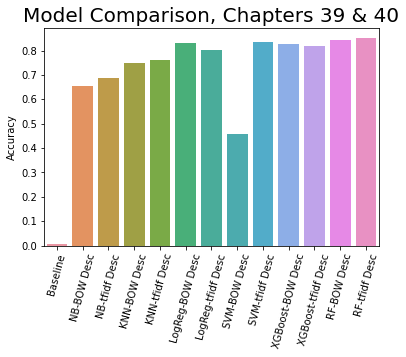

In [27]:
ax = sns.barplot(x=results.index, y=results["Accuracy"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)
plt.title("Model Comparison, Chapters 39 & 40", size=20)

In [23]:
results.to_csv('ModelResults_Chp39_40_'+ '03022021' + '.csv', index=False)

## Work with the BERT embeddings

In [ ]:
models = {
    'knn' : KNeighborsClassifier(), 'logit' : LogisticRegression(), 'svm': SVC()
}

for model, call in models.items():
    print(f'Training {model}')
    call.fit(X_train['BERT_Product Desc'], y_train)
    pred = call.predict(X_dev['BERT_Product Desc'], y_dev)
    print(accuracy_score(y_dev, pred))
    print()